In [13]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [14]:
df = pd.read_parquet("../data/time_slices.parquet")

X = df.drop(["winner", "season", "game"], axis=1)
y = df["winner"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=42
)

In [15]:
forest = RandomForestClassifier(
    n_estimators=200,
    max_depth=12,
    max_features='sqrt',
    bootstrap=True,
    n_jobs=-1  # use all CPU cores
)

forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=12, n_estimators=200, n_jobs=-1)

In [16]:
y_pred = forest.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.8219


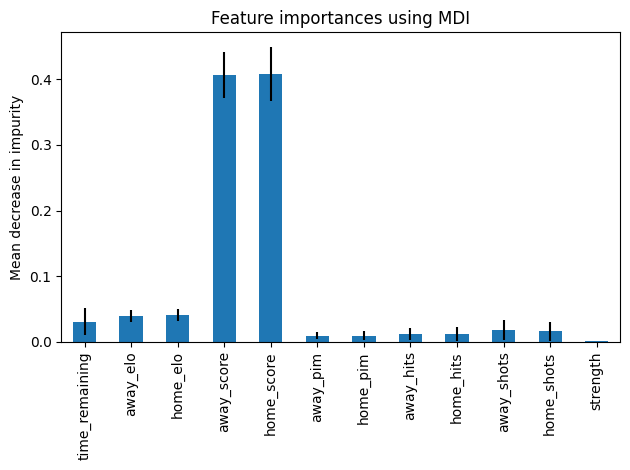

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

forest_importances = pd.Series(importances, index=X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()


In [21]:
import pickle

with open("models/meter_rf.pkl", "wb") as f:
    pickle.dump(forest, f)